# Naive Bayes Implementation

### Image Mode

In [42]:
IMAGE_MODE = 1      #1 for colour, 0 for grayscale, unchanged for -1

### Datasets locations:

In [43]:
import os

height = 25
width = 25

train_csv = os.path.join(os.path.pardir, "Datasets", 'Resized_data_{}_{}'.format(height, width), 'train.csv')
test_csv = os.path.join(os.path.pardir, "Datasets", 'Resized_data_{}_{}'.format(height, width), 'test.csv')

N_CLASSES = 2

## Imports

In [44]:
from sklearn.naive_bayes import GaussianNB
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import cv2

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

## Loading the dataset

In [45]:
train_df = pd.read_csv(train_csv)
test_df = pd.read_csv(test_csv)

In [46]:
train_df.head()

,Image_Path,Parasitized
0,..\Datasets\Resized_data_25_25\Parasitized\25x...,1.0
1,..\Datasets\Resized_data_25_25\Parasitized\25x...,1.0
2,..\Datasets\Resized_data_25_25\Uninfected\25x2...,0.0
3,..\Datasets\Resized_data_25_25\Parasitized\25x...,1.0
4,..\Datasets\Resized_data_25_25\Parasitized\25x...,1.0


In [47]:
train_df.dtypes

Image_Path      object
Parasitized    float64
dtype: object

## Data and Labels

In [48]:
train_x = train_df['Image_Path'].to_numpy()
train_y = train_df['Parasitized'].to_numpy()

test_x  = test_df['Image_Path'].to_numpy()
test_y  = test_df['Parasitized'].to_numpy()

#### Load images from paths

In [49]:
def load_images(path_arr):
    '''Reads and loads images into a numpy array
    Returns: a numpy array'''
    arr = []
    for path in path_arr:
        arr.append(cv2.imread(path, IMAGE_MODE))
    
    return np.array(arr)


In [50]:
train_x = load_images(train_x)
test_x = load_images(test_x)

#### Checking shape

In [51]:
print(train_x.shape, test_x.shape, sep = '\n')

(24802, 25, 25)
(2756, 25, 25)


## Flattening

In [52]:
num_train, num_test = train_x.shape[0], test_x.shape[0]

dim = 1
for i in train_x.shape[1:]: dim*=i

print(num_train, dim)

24802 625


In [53]:
train_x = train_x.reshape([num_train, dim])
test_x = test_x.reshape([num_test, dim])

## Naive Bayes

In [54]:
nb = GaussianNB()

nb.fit(train_x, train_y)

GaussianNB()

## Performance Evaluation

In [55]:
y_pred_train = nb.predict(train_x)
y_pred_test  = nb.predict(test_x)

In [56]:
print(y_pred_test)

[0. 0. 1. ... 0. 1. 1.]


#### Accuracy

In [57]:
acc_train = accuracy_score(train_y, y_pred_train)
acc_test  = accuracy_score(test_y , y_pred_test)

print("Training Accuracy is: {:.4f} and Validation Accuracy is: {:.4f}".format(acc_train, acc_test))

Training Accuracy is: 0.6120 and Validation Accuracy is: 0.6103


#### Precision

In [58]:
prec_train = precision_score(train_y, y_pred_train)
prec_test  = precision_score(test_y , y_pred_test)

print("Training Precision is: {:.4f} and Validation Precision is: {:.4f}".format(prec_train, prec_test))

Training Precision is: 0.6627 and Validation Precision is: 0.6587


#### Recall

In [59]:
recall_train = recall_score(train_y, y_pred_train)
recall_test  = recall_score(test_y , y_pred_test)

print("Training Recall is: {:.4f} and Validation Recall is: {:.4f}".format(recall_train, recall_test))

Training Recall is: 0.4564 and Validation Recall is: 0.4579


#### F1 Score

In [60]:
f1_train = f1_score(train_y, y_pred_train)
f1_test  = f1_score(test_y , y_pred_test)

print("Training F1-Score is: {:.4f} and Validation F1-Score is: {:.4f}".format(f1_train, f1_test))

Training F1-Score is: 0.5405 and Validation F1-Score is: 0.5402


#### ROC AUC

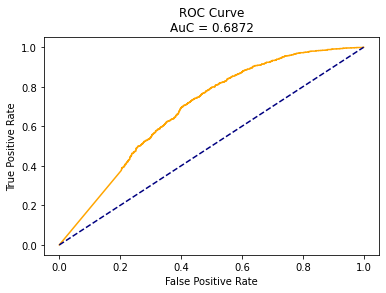

In [61]:
y_score = nb.predict_proba(test_x)

fpr, tpr, _ = roc_curve(test_y, y_score[:, 1], pos_label = 1)
roc_auc = roc_auc_score(test_y, y_score[:, 1])

plt.plot(fpr, tpr, color = 'orange')
plt.plot([0,1], [0,1], color = 'navy', linestyle = '--')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve\nAuC = {:.4f}".format(roc_auc))

plt.show()
